In [719]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [720]:
data=pd.read_csv('/content/HDFCBANK.csv')

In [721]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [722]:
data.shape

(5306, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [723]:
data['Date']=pd.to_datetime(data['Date'])

In [724]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [725]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [726]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [727]:
df=data.loc[:,'Prev Close':]

In [728]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN,2.409639,8.005083
1,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN,7.280702,2.235294
2,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN,5.393939,-3.941312
3,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN,2.843315,0.808625
4,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN,5.457909,0.029709


In [729]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [730]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3719,2014-12-02,HDFCBANK,EQ,950.00,941.75,949.60,939.2,942.00,943.30,943.71,1129389,1.065818e+14,17017.0,484262.0,0.4288,1.107325,-0.705263
3720,2014-12-03,HDFCBANK,EQ,943.30,942.00,944.05,932.0,932.50,933.10,937.18,1665296,1.560677e+14,37465.0,882754.0,0.5301,1.292918,-1.081310
3721,2014-12-04,HDFCBANK,EQ,933.10,940.00,944.25,932.0,941.35,941.40,937.19,1709776,1.602379e+14,35647.0,1105271.0,0.6464,1.314378,0.889508
3722,2014-12-05,HDFCBANK,EQ,941.40,941.00,944.40,935.7,942.00,942.75,939.67,1018545,9.570949e+13,16965.0,495473.0,0.4865,0.929785,0.143403
3723,2014-12-08,HDFCBANK,EQ,942.75,945.00,945.00,925.0,927.80,927.15,935.19,1014282,9.485477e+13,22837.0,510138.0,0.5030,2.162162,-1.654733


In [731]:
df=new_df.loc[:,'Prev Close':]

In [732]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.997856,0.997529,0.997521,0.997211,0.997205,0.997546,-0.235099,-0.030756,-0.061904,-0.169831,0.206566,-0.253850,-0.048229
Open,0.997856,1.000000,0.999623,0.999562,0.999238,0.999232,0.999640,-0.231080,-0.025774,-0.060718,-0.165590,0.206135,-0.253553,-0.000810
High,0.997529,0.999623,1.000000,0.999426,0.999659,0.999656,0.999825,-0.222605,-0.017309,-0.052241,-0.158061,0.202189,-0.239159,0.011538
Low,0.997521,0.999562,0.999426,1.000000,0.999599,0.999621,0.999812,-0.242316,-0.037314,-0.073534,-0.176926,0.211458,-0.270089,0.010562
Last,0.997211,0.999238,0.999659,0.999599,1.000000,0.999980,0.999820,-0.232370,-0.027587,-0.062710,-0.167693,0.206183,-0.252732,0.022028
Close,0.997205,0.999232,0.999656,0.999621,0.999980,1.000000,0.999837,-0.232940,-0.028107,-0.063584,-0.168330,0.206425,-0.253498,0.022511
VWAP,0.997546,0.999640,0.999825,0.999812,0.999820,0.999837,1.000000,-0.232416,-0.027139,-0.063322,-0.167443,0.206454,-0.254595,0.013970
Volume,-0.235099,-0.231080,-0.222605,-0.242316,-0.232370,-0.232940,-0.232416,1.000000,0.948406,0.892383,0.951064,-0.365416,0.661465,0.059457
Turnover,-0.030756,-0.025774,-0.017309,-0.037314,-0.027587,-0.028107,-0.027139,0.948406,1.000000,0.853504,0.942086,-0.297736,0.568097,0.063675
Trades,-0.061904,-0.060718,-0.052241,-0.073534,-0.062710,-0.063584,-0.063322,0.892383,0.853504,1.000000,0.826693,-0.342553,0.671177,-0.008915


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.67) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.66).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.56).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.307) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.06) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(-0.008) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.059) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.038)suggest a negative relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [733]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [734]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [735]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [736]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,82923.625407,1.261883e+06,0.595003,2.409639,8.005083
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,82923.625407,1.261883e+06,0.595003,7.280702,2.235294
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,82923.625407,1.261883e+06,0.595003,5.393939,-3.941312
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,82923.625407,1.261883e+06,0.595003,2.843315,0.808625
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,82923.625407,1.261883e+06,0.595003,5.457909,0.029709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.000000,9.791881e+06,0.649100,1.871324,-0.661175
5302,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.000000,5.650216e+06,0.548800,2.648064,2.413155
5303,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.000000,7.196647e+06,0.597100,3.354298,2.648224
5304,2021-04-29,HDFCBANK,EQ,1476.80,1486.20,1503.65,1461.00,1471.65,1472.50,1481.15,12039276,1.783196e+15,252296.000000,4.818551e+06,0.400200,2.919233,-0.291170


In [737]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [738]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


     Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0  HDFCBANK         0.080449                    0.50735             2.953567   

    Mean Volume  Mean Deliverable (%)    Mean VWAP  Overall Score  
0  2.102580e+06              0.595003  1006.929263    1158.259283  


In [739]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,82923.625407,1.261883e+06,0.595003,2.409639,8.005083
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,82923.625407,1.261883e+06,0.595003,7.280702,2.235294
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,82923.625407,1.261883e+06,0.595003,5.393939,-3.941312
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,82923.625407,1.261883e+06,0.595003,2.843315,0.808625
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,82923.625407,1.261883e+06,0.595003,5.457909,0.029709


In [740]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,82923.625407,1.261883e+06,0.595003,2.409639,8.005083
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,82923.625407,1.261883e+06,0.595003,7.280702,2.235294
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,82923.625407,1.261883e+06,0.595003,5.393939,-3.941312
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,82923.625407,1.261883e+06,0.595003,2.843315,0.808625
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,82923.625407,1.261883e+06,0.595003,5.457909,0.029709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.000000,9.791881e+06,0.649100,1.871324,-0.661175
5302,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.000000,5.650216e+06,0.548800,2.648064,2.413155
5303,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.000000,7.196647e+06,0.597100,3.354298,2.648224
5304,2021-04-29,HDFCBANK,EQ,1476.80,1486.20,1503.65,1461.00,1471.65,1472.50,1481.15,12039276,1.783196e+15,252296.000000,4.818551e+06,0.400200,2.919233,-0.291170


 Feature engineer and build machine learning solutions for the business
 Requirements

In [741]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [742]:
data['Volume_Change'] = data['Volume'].pct_change()


In [743]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [744]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [745]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,...,82923.625407,1.261883e+06,0.595003,2.409639,8.005083,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,...,82923.625407,1.261883e+06,0.595003,7.280702,2.235294,0.022353,4.072612,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,...,82923.625407,1.261883e+06,0.595003,5.393939,-3.941312,-0.017941,-0.052694,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,...,82923.625407,1.261883e+06,0.595003,2.843315,0.808625,-0.010000,-0.467989,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,...,82923.625407,1.261883e+06,0.595003,5.457909,0.029709,-0.009706,0.001388,NaN,NaN,NaN


In [746]:
data['Target_Close'] = data['Close'].shift(-1)


In [747]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,...,1.261883e+06,0.595003,2.409639,8.005083,0.000000,NaN,NaN,NaN,NaN,173.80
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,...,1.261883e+06,0.595003,7.280702,2.235294,0.022353,4.072612,NaN,NaN,NaN,166.95
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,...,1.261883e+06,0.595003,5.393939,-3.941312,-0.017941,-0.052694,NaN,NaN,NaN,168.30
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,...,1.261883e+06,0.595003,2.843315,0.808625,-0.010000,-0.467989,NaN,NaN,NaN,168.35
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,...,1.261883e+06,0.595003,5.457909,0.029709,-0.009706,0.001388,NaN,NaN,NaN,165.90


Mean Squared Error: 426.4373352101267
R2 Score: 0.9989169139989676


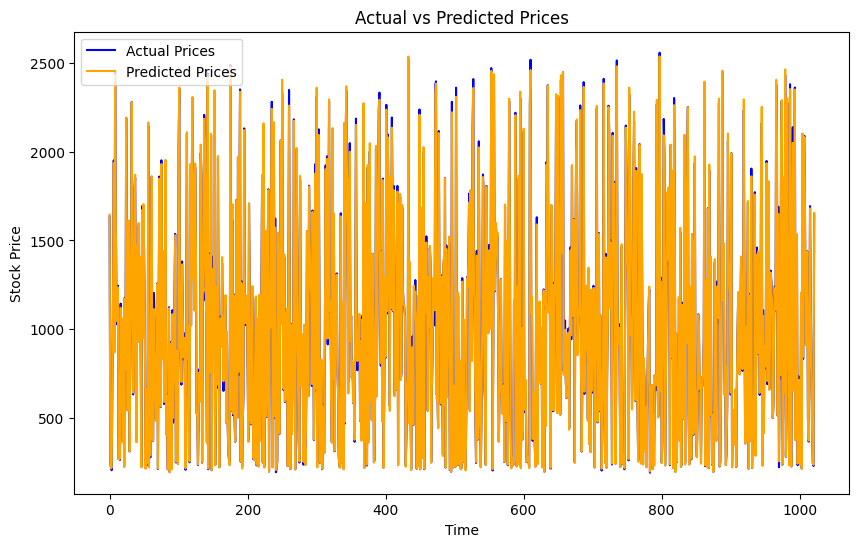

In [748]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [749]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,HDFCBANK,EQ,238.05,239.0,244.0,238.00,241.15,241.90,241.93,...,2.521008,1.617307,0.422941,0.332327,235.633,237.9110,7.796428,244.70,0.016173,233.6325
200,2000-10-20,HDFCBANK,EQ,241.90,245.0,247.0,243.00,243.10,244.70,244.46,...,1.646091,1.157503,0.439412,-0.155837,235.466,238.2845,7.827904,243.10,0.011575,234.6650
201,2000-10-23,HDFCBANK,EQ,244.70,245.0,246.9,242.50,242.75,243.10,243.72,...,1.814433,-0.653862,0.430000,-0.501205,235.447,238.6310,6.826718,243.25,-0.006539,235.9750
202,2000-10-24,HDFCBANK,EQ,243.10,241.0,244.0,240.50,243.05,243.25,242.46,...,1.455301,0.061703,0.430882,0.852285,235.439,239.0125,6.371224,241.40,0.000617,236.9475
203,2000-10-25,HDFCBANK,EQ,243.25,244.0,244.0,240.15,241.85,241.40,241.97,...,1.603165,-0.760534,0.420000,-0.467016,235.423,239.3780,5.428240,241.35,-0.007605,237.9000


In [750]:
features=['Date','Close']

In [751]:
my_data=data[features]

In [752]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-752-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [753]:
my_data

,Date,Close
199,2000-10-19,241.90
200,2000-10-20,244.70
201,2000-10-23,243.10
202,2000-10-24,243.25
203,2000-10-25,241.40
...,...,...
5300,2021-04-23,1414.15
5301,2021-04-26,1404.80
5302,2021-04-27,1438.70
5303,2021-04-28,1476.80


In [754]:
my_data.index=my_data['Date']

In [755]:
del my_data['Date']

<Axes: xlabel='Date'>

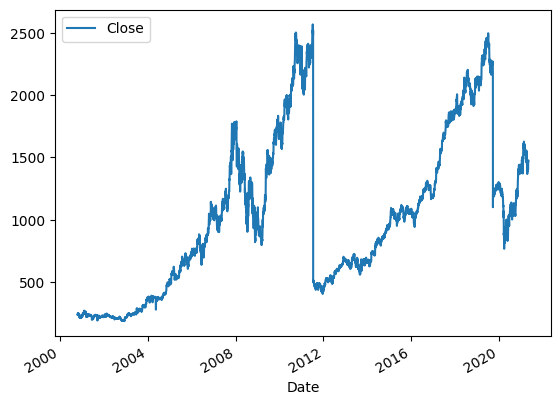

In [756]:
my_data.plot()

In [757]:
std_log=my_data.rolling(window=4).std()

In [758]:
mean_log=my_data.rolling(window=4).mean()

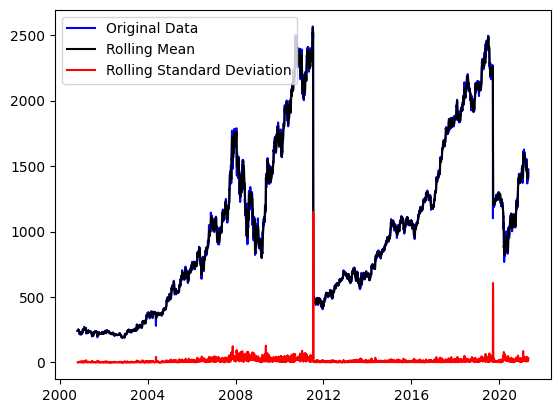

In [759]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [760]:
from statsmodels.tsa.stattools  import adfuller

In [761]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [762]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-2.289560167130861
p_value:0.1753571357484554
num_lags:0
num_observations:5105
critical_values:{'1%': -3.431631604543944, '5%': -2.8621063331869445, '10%': -2.5670714594015394}
AIC:51331.74066628082


In [763]:
import numpy as np

In [764]:
first_log=np.log(my_data)

In [765]:
first_log.dropna()

,Close
Date,
2000-10-19,5.488524
2000-10-20,5.500033
2000-10-23,5.493473
2000-10-24,5.494090
2000-10-25,5.486455
...,...
2021-04-23,7.254284
2021-04-26,7.247650
2021-04-27,7.271495


<Axes: xlabel='Date'>

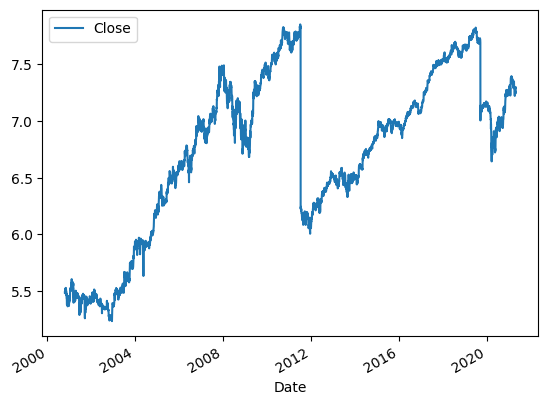

In [766]:
first_log.plot()

In [767]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

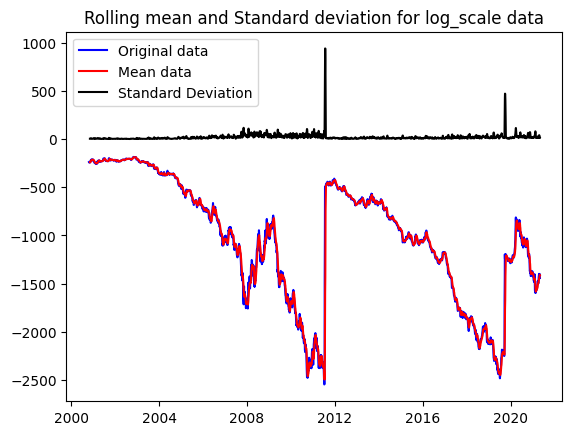

In [768]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [769]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-237.743410
2000-10-25,-237.626045
...,...
2021-04-23,-1402.858216
2021-04-26,-1400.964850
2021-04-27,-1412.766005


In [770]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

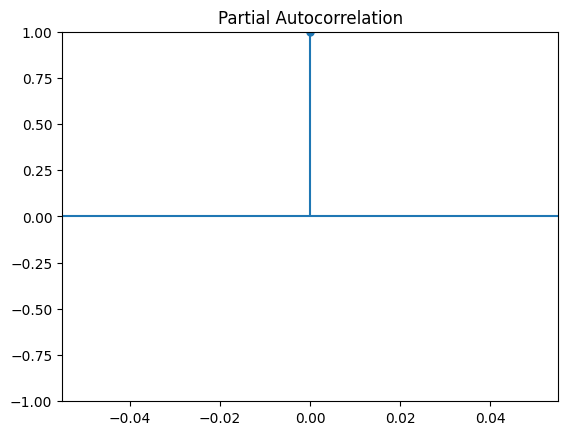

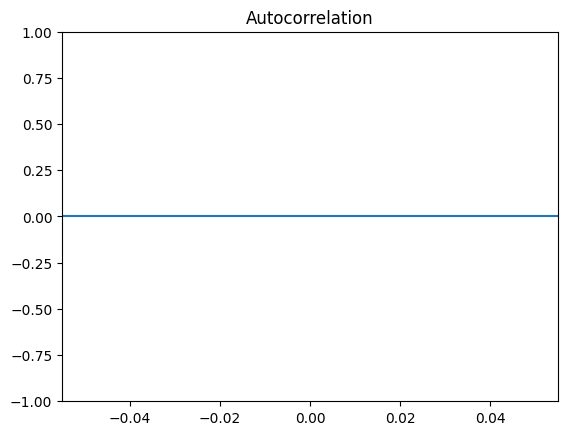

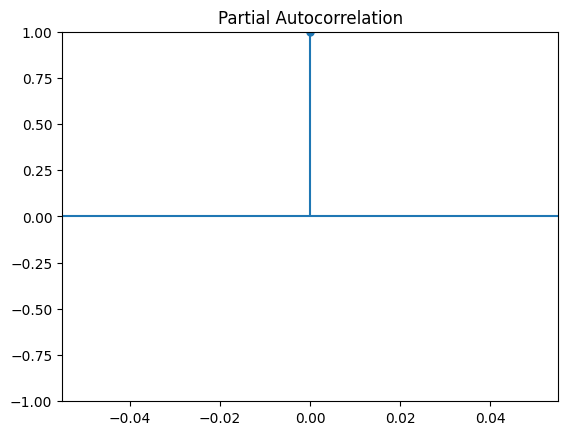

In [771]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [772]:
from statsmodels.tsa.arima.model import ARIMA

In [773]:
train=new_df.iloc[:120]['Close']

In [774]:
test=new_df.iloc[120:]

In [775]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [776]:
model_fit=model.fit()

In [777]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -473.928
Date:                Sat, 07 Dec 2024   AIC                            957.856
Time:                        12:06:49   BIC                            971.794
Sample:                             0   HQIC                           963.517
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1003.0844     29.226     34.321      0.000     945.802    1060.367
ar.L1          0.9762      0.022     44.920      0.000       0.934       1.019
ma.L1         -0.0966      0.093     -1.038      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

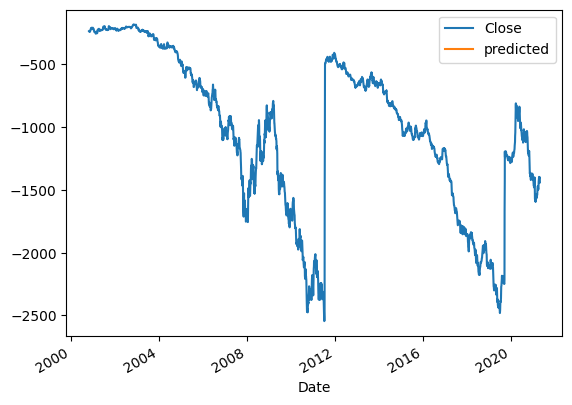

In [778]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [779]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [780]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('N

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

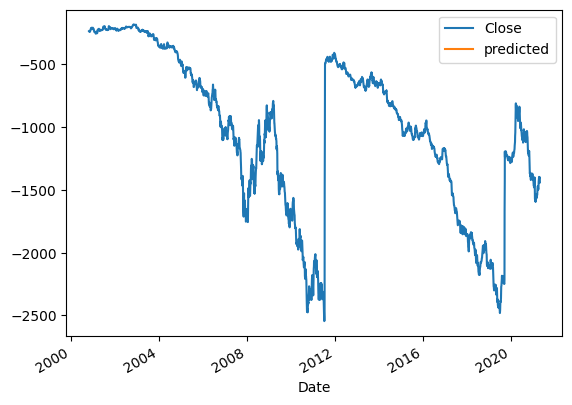

In [781]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


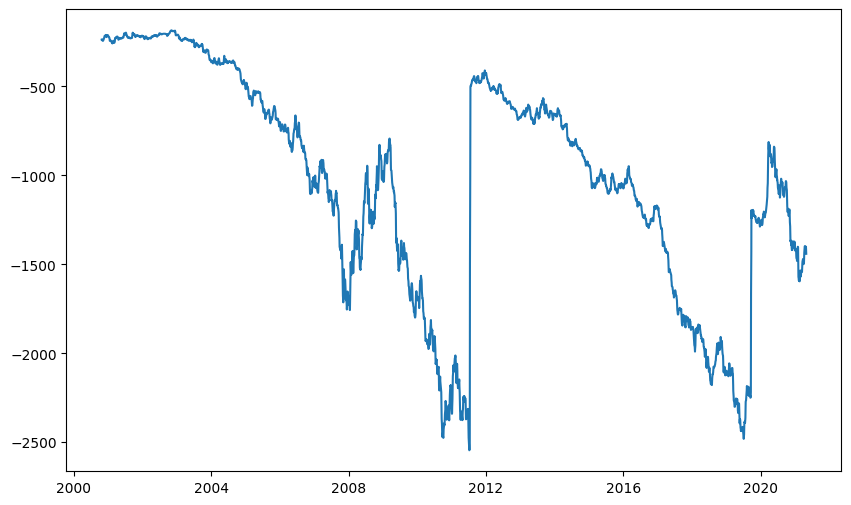

In [782]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

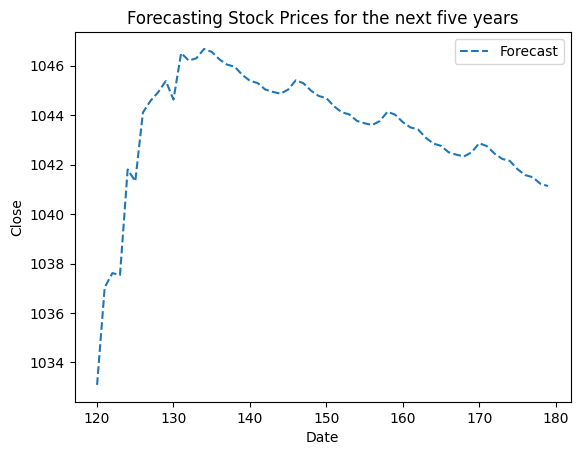

In [783]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()